<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/Handy_DL_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
rm(list=ls())
library(dplyr)
library(keras)
library(tensorflow)

In [43]:
data = mtcars
rownames(data) = NULL
target = data$am
data = data %>% select(-am)
train_label_clean = to_categorical(target)
train = as.matrix(data)

In [44]:
model = keras_model_sequential()
model %>%
  layer_dense(units = 50,activation = 'relu',input_shape = c(ncol(train))) %>%
  layer_dense(units = 20, activation = 'relu') %>%
  layer_dense(units = 10, activation = "sigmoid") %>%
  layer_dense(units = 2, activation = 'relu')

summary(model)

model %>% compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=c('accuracy')
)

Model: "sequential_7"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_33 (Dense)                    (None, 50)                      550         
________________________________________________________________________________
dense_32 (Dense)                    (None, 20)                      1020        
________________________________________________________________________________
dense_31 (Dense)                    (None, 10)                      210         
________________________________________________________________________________
dense_30 (Dense)                    (None, 2)                       22          
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
________________________________________________________________________________


In [45]:
fitModel =
  model %>%
  fit(train,
      train_label_clean,
      epochs = 200,
      batch_size = 35,
      validation_split = 0.5)

`geom_smooth()` using formula 'y ~ x'



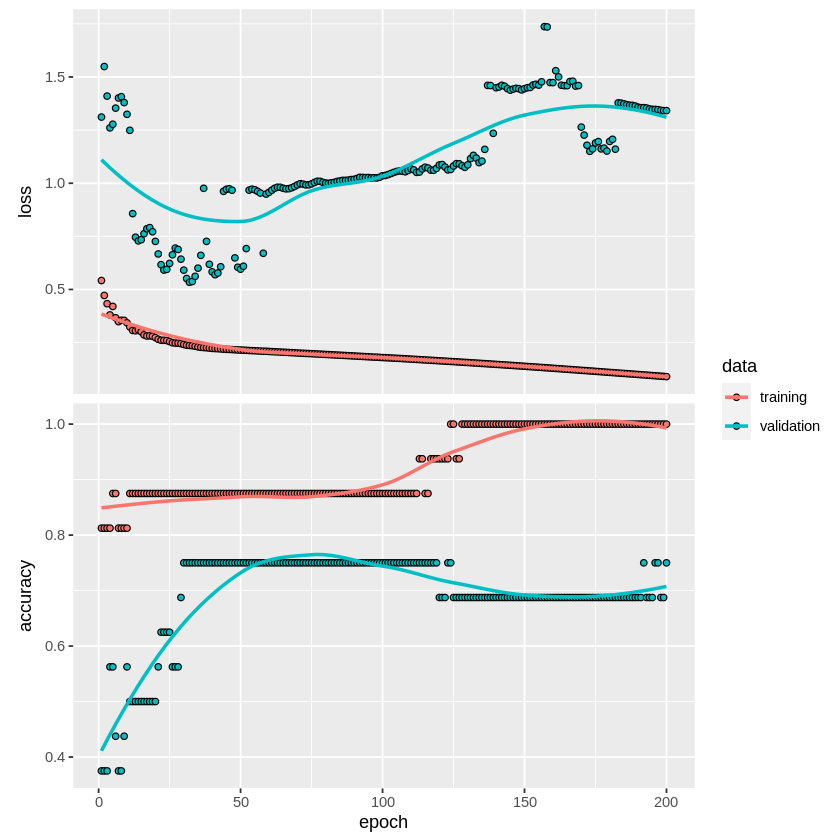

In [46]:
plot(fitModel)

In [47]:
pred = model %>% predict_classes(train)
pred

table(pred,target)
mean(pred == target) * 100

[1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1

    target
pred  0  1
   0 19  4
   1  0  9

[1] 87.5